# Viz NBA Stats
Data obtained from https://www.kaggle.com/drgilermo/nba-players-stats

In [1]:
import pandas as pd
import numpy as np

In [2]:
from clustergrammer2 import Network, CGM2

>> clustergrammer2 backend version 0.17.0


In [3]:
net = Network(CGM2)

In [4]:
df = {}

In [5]:
df['season-ini'] = pd.read_csv('../data/nba-players-stats/Seasons_Stats.csv', index_col=0)
df['season-ini'].shape

(24691, 52)

In [6]:
cols = df['season-ini'].columns.tolist()
keep_cols = cols[-26:]
print(len(keep_cols))
mat = df['season-ini'][keep_cols].values
print(mat.shape)

26
(24691, 26)


In [7]:
ser_year = df['season-ini']['Year']
ser_player = df['season-ini']['Player']
ser_age = df['season-ini']['Age']
ser_team = df['season-ini']['Tm']
ser_pos = df['season-ini']['Pos']
rows = []
for index in range(ser_player.shape[0]):
    inst_year = ser_year.iloc[index]
    inst_player = ser_player.iloc[index]
    inst_age = ser_age.iloc[index]
    inst_team = ser_team.iloc[index]
    inst_pos = ser_pos.iloc[index]
    inst_name = str(inst_player) + '_' + str(inst_year) + '_' + str(inst_team) + '_' + str(inst_age)
    inst_row = (inst_name, 'Position: ' + str(inst_pos), 'Team: ' + str(inst_team), 'Player: ' + str(inst_player))
    rows.append(inst_row)
print(len(rows))
print(len(list(set(rows))))

24691
24625


In [8]:
df['season'] = pd.DataFrame(data=mat, index=rows, columns=keep_cols).transpose()
df['season'].shape

(26, 24691)

In [9]:
keep_cols = [x for x in df['season'].columns.tolist() if float(x[0].split('_')[1]) >= 2005]
df['modern-era'] = df['season'][keep_cols]
df['modern-era'].shape

(26, 7603)

In [10]:
net.load_df(df['modern-era'])
net.swap_nan_for_zero()
net.normalize(axis='row', norm_type='zscore')
df['modern-era-z'] = net.export_df()
net.clip(-5,5)
net.load_df(net.export_df())
net.widget()

CGM2(network='{"row_nodes": [{"name": "OBPM", "ini": 26, "clust": 17, "rank": 24, "rankvar": 0}, {"name": "DBP…

In [13]:
cat_colors = net.viz['global_cat_colors']
# color_list = [cat_colors[df['meta_food'].loc[x, 'Food Type']] for x in df['food'].columns.tolist()]

In [15]:
import umap

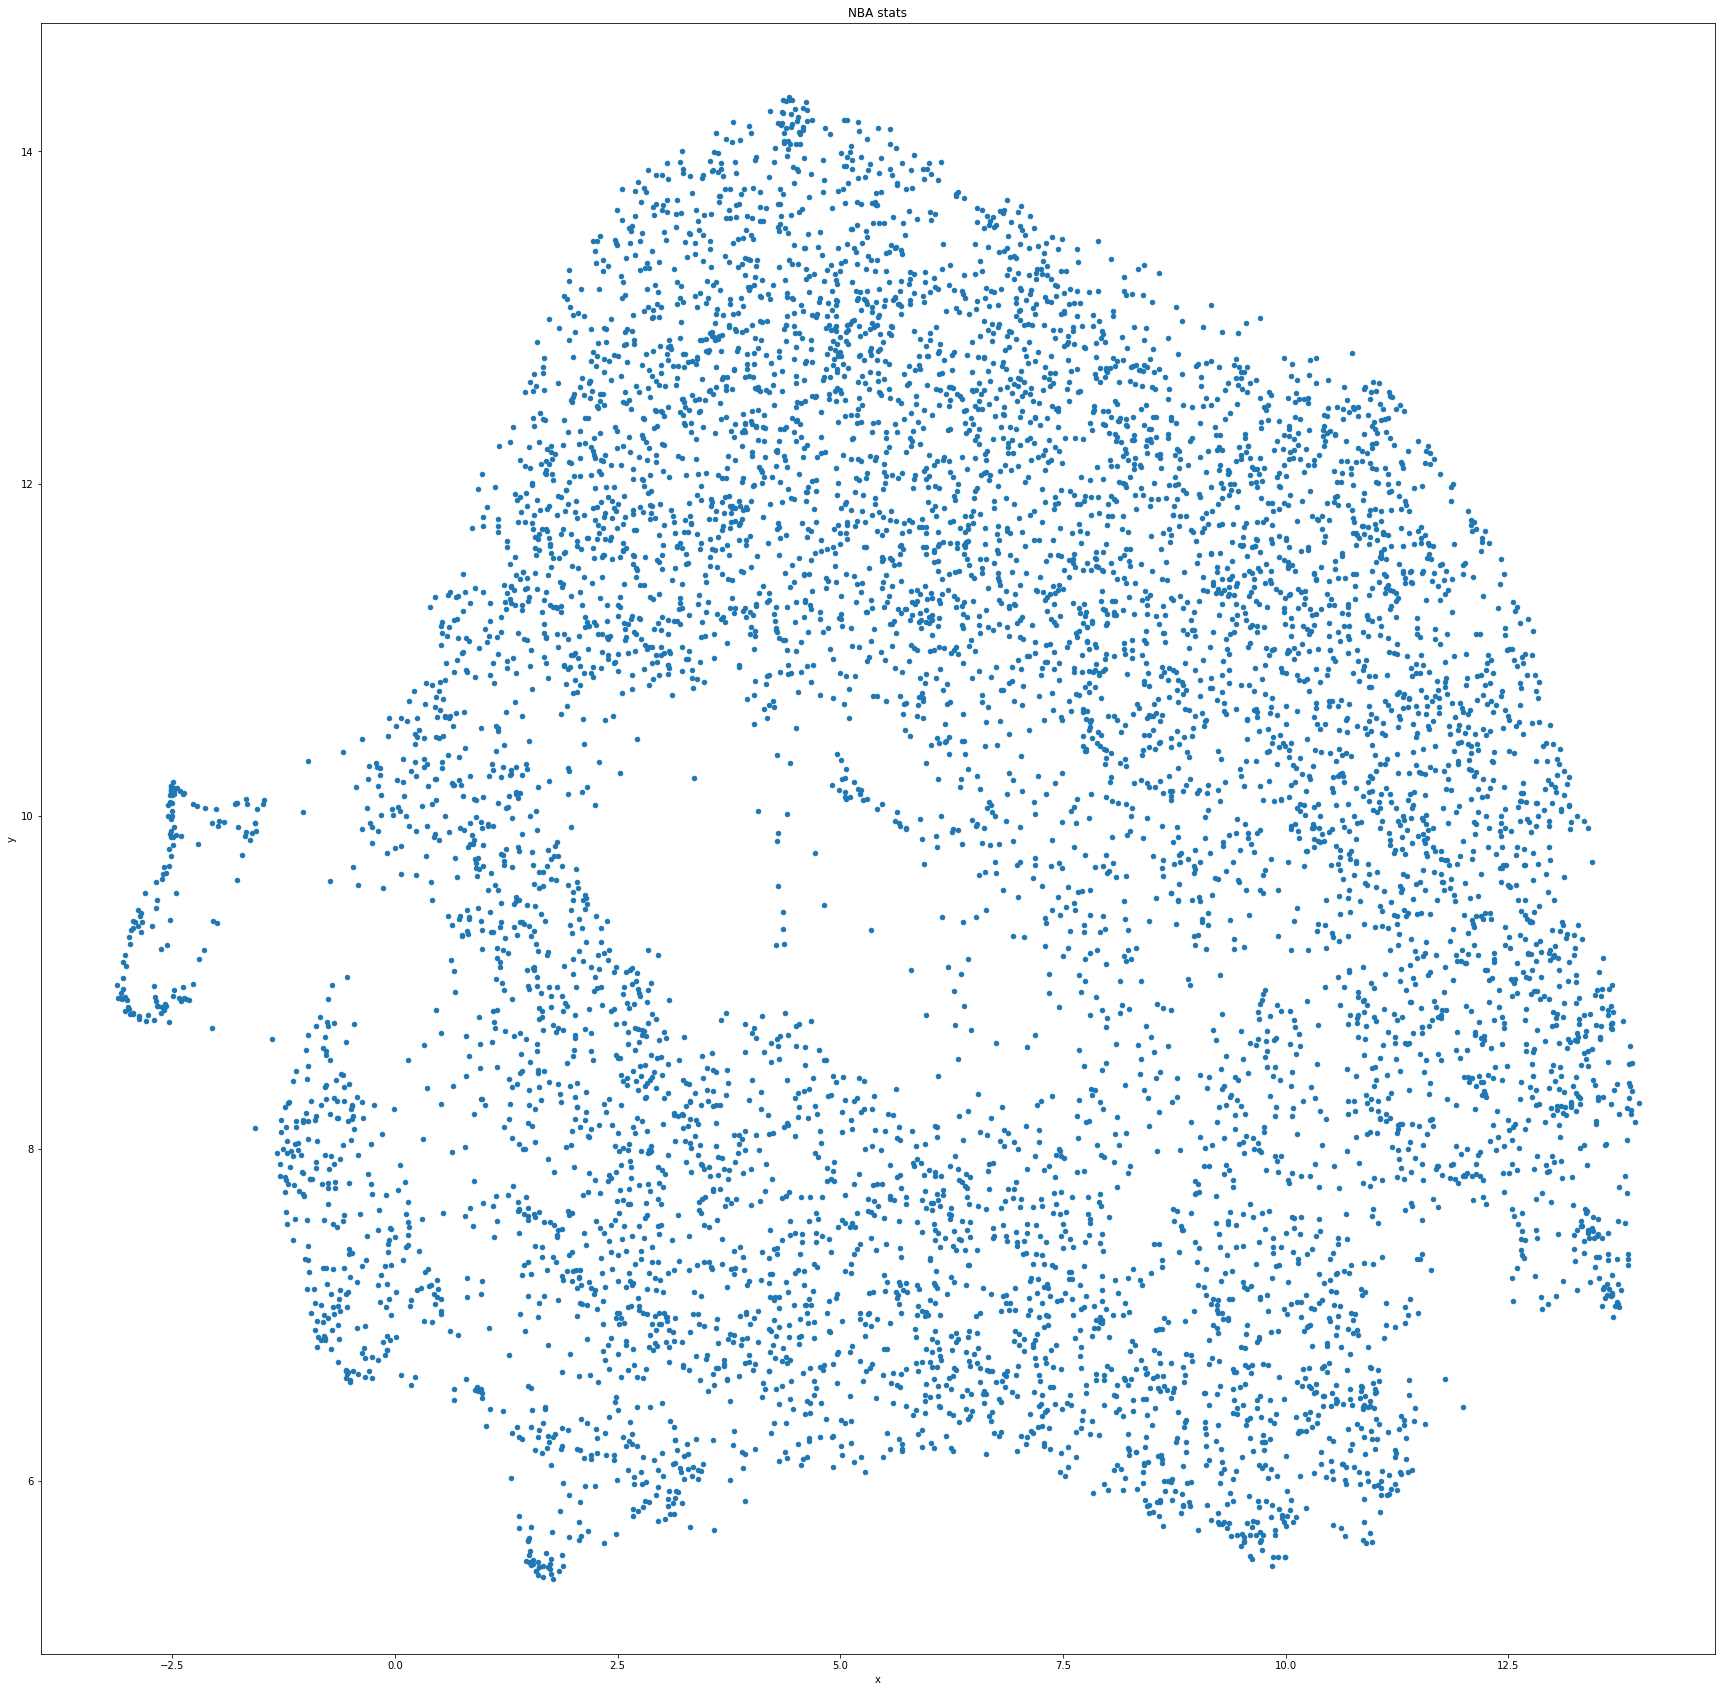

In [17]:
# n_neighbors = 20
df['modern-era-z-t'] = df['modern-era-z'].transpose()
embedding = umap.UMAP(
                    n_neighbors=20, 
                    random_state=99, 
                      min_dist=0.25,
                      ).fit_transform(df['modern-era-z-t'])

df_umap = pd.DataFrame(data=embedding, columns=['x', 'y'])
df_umap.plot(kind='scatter', x='x', y='y', alpha=1, s=20, figsize=(30,30),  title='NBA stats')

In [18]:
df_umap.to_csv('../data/nba-players-stats-UMAP.csv')